# Test model
Handling Panns cnn14

In [1]:
from audiointerp.dataset.esc50 import ESC50dataset
from audiointerp.model.cnn14 import TransferCnn14
from audiointerp.fit import Trainer
from audiointerp.processing.spectrogram import LogMelSTFTSpectrogram
import torch.nn as nn
import torch.optim as optim
import torchaudio.transforms as T_audio
import torchvision.transforms as T_vision
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
root_dir = "/home/yuliya/ESC50"
sr = 32000
train_folds = [1, 2, 3]
valid_folds = [4]
test_folds = [5]

In [3]:
n_fft = 1024
hop_length = 320
win_length = 1024
n_mels = 64
f_min = 50
f_max = 14000
top_db = 80

In [4]:
feature_extractor = LogMelSTFTSpectrogram(
    n_fft=n_fft, win_length=win_length, hop_length=hop_length,
    sample_rate=sr, n_mels=n_mels, f_min=f_min, f_max=f_max, top_db=top_db,
    return_phase=False, return_full_db=False
)

In [5]:
time_augs = nn.Sequential(
    T_vision.RandomApply((T_audio.Vol(1.5),), p=0.2)
)

In [ ]:
feature_augs = nn.Sequential(
    T_audio.FrequencyMasking(20),
    T_audio.TimeMasking(20)
)

In [7]:
train_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=train_folds, feature_extractor=feature_extractor, time_augs=time_augs, feature_augs=feature_augs)
valid_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=valid_folds, feature_extractor=feature_extractor)
test_data = ESC50dataset(root_dir=root_dir, sr=sr, folds=test_folds, feature_extractor=feature_extractor)

In [8]:
train_loader_kwargs = {"batch_size": 32, "shuffle": True}
valid_loader_kwargs = {"batch_size": 32, "shuffle": False}
test_loader_kwargs = {"batch_size": 32, "shuffle": False}

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cls = TransferCnn14
model_kwargs = {"num_classes": 50}
model_pretrain_weights_path = "weights/Cnn14_mAP=0.431.pth"

optimizer_cls = optim.Adam
optimizer_kwargs = {"lr": 1e-3}

criterion_cls = nn.CrossEntropyLoss

In [10]:
def plot_learning_curves(train_losses, val_losses, train_accs=None, val_accs=None):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Train Loss")
    if val_losses:
        plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curve")
    plt.legend()

    plt.subplot(1, 2, 2)
    if train_accs is not None:
        plt.plot(epochs, train_accs, label="Train Acc")
    if val_accs is not None:
        plt.plot(epochs, val_accs, label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Curve")
    plt.legend()

    plt.tight_layout()
    plt.show()

In [11]:
model_trainer = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs
)

Random seed set to: 42


In [12]:
train_losses, train_accs, val_losses, val_accs, test_loss, test_acc = model_trainer.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [00:43<01:26, 43.12s/it]

Train Loss: 2.7270, Train Acc: 0.3158
Valid Loss: 0.8440, Valid Acc: 0.7800


Epoch:  67%|██████▋   | 2/3 [01:30<00:45, 45.54s/it]

Train Loss: 0.8716, Train Acc: 0.7508
Valid Loss: 0.6249, Valid Acc: 0.8200


Epoch: 100%|██████████| 3/3 [02:13<00:00, 44.55s/it]


Train Loss: 0.5213, Train Acc: 0.8492
Valid Loss: 0.4634, Valid Acc: 0.8575
Best val Acc: 0.8575
Модель сохранена в best.pth
Test Loss: 0.6550, Test Acc: 0.7875


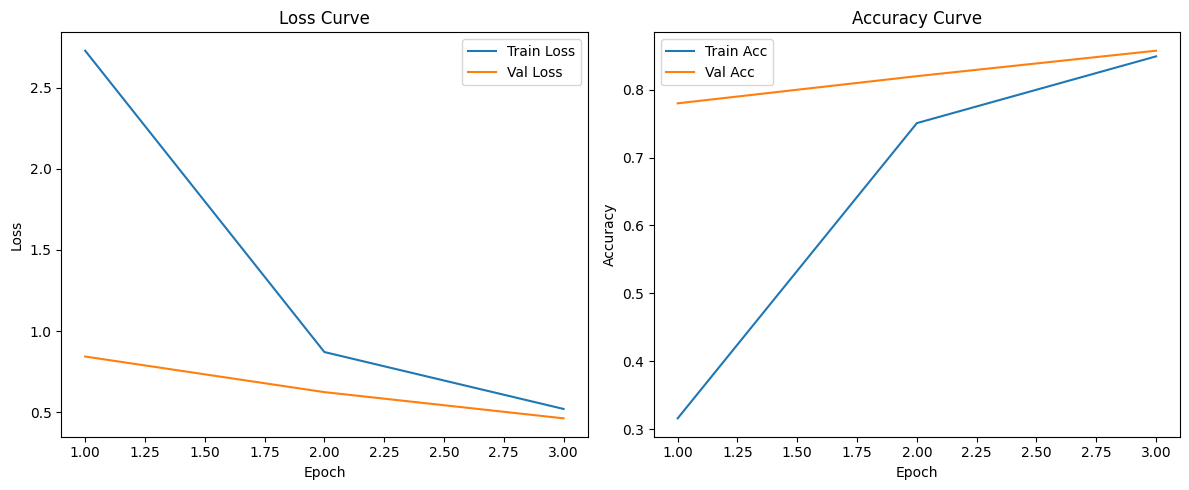

In [13]:
plot_learning_curves(train_losses, val_losses, train_accs, val_accs)

In [61]:
model_trainer2 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs
)

Random seed set to: 42


In [15]:
train_losses2, train_accs2, val_losses2, val_accs2, test_loss2, test_acc2 = model_trainer2.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [00:45<01:30, 45.41s/it]

Train Loss: 2.7270, Train Acc: 0.3158
Valid Loss: 0.8440, Valid Acc: 0.7800


Epoch:  67%|██████▋   | 2/3 [01:37<00:49, 49.07s/it]

Train Loss: 0.8716, Train Acc: 0.7508
Valid Loss: 0.6249, Valid Acc: 0.8200


Epoch: 100%|██████████| 3/3 [02:24<00:00, 48.28s/it]


Train Loss: 0.5213, Train Acc: 0.8492
Valid Loss: 0.4634, Valid Acc: 0.8575
Best val Acc: 0.8575
Модель сохранена в best.pth
Test Loss: 0.6550, Test Acc: 0.7875


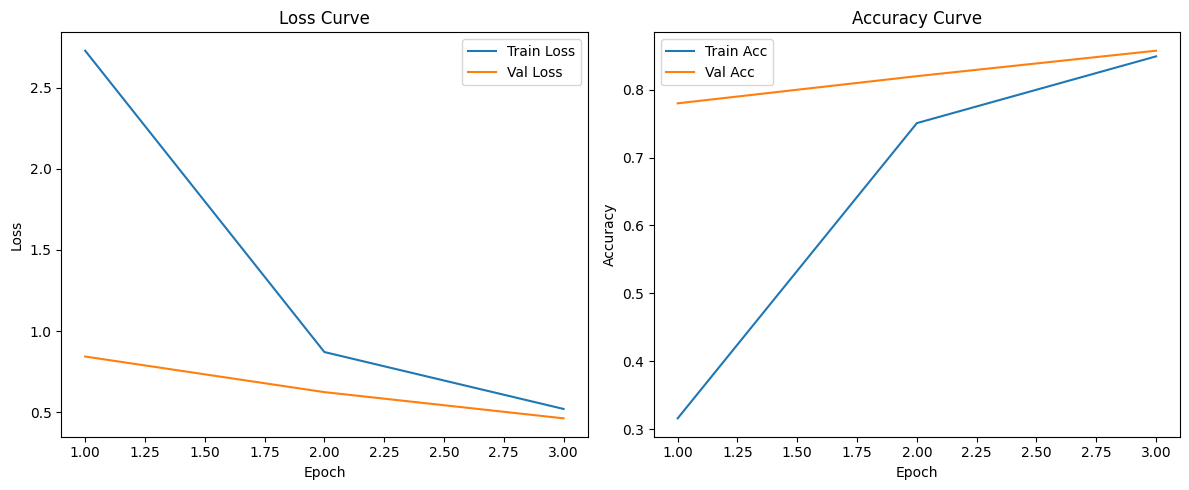

In [16]:
plot_learning_curves(train_losses2, val_losses2, train_accs2, val_accs2)

In [17]:
model_trainer2.reset()

Random seed set to: 42


In [18]:
train_losses2_r, train_accs2_r, val_losses2_r, val_accs2_r, test_loss2_r, test_acc2_r = model_trainer2.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [00:50<01:41, 50.81s/it]

Train Loss: 2.7270, Train Acc: 0.3158
Valid Loss: 0.8440, Valid Acc: 0.7800


Epoch:  67%|██████▋   | 2/3 [01:40<00:50, 50.30s/it]

Train Loss: 0.8716, Train Acc: 0.7508
Valid Loss: 0.6249, Valid Acc: 0.8200


Epoch: 100%|██████████| 3/3 [02:30<00:00, 50.05s/it]


Train Loss: 0.5213, Train Acc: 0.8492
Valid Loss: 0.4634, Valid Acc: 0.8575
Best val Acc: 0.8575
Модель сохранена в best.pth
Test Loss: 0.6550, Test Acc: 0.7875


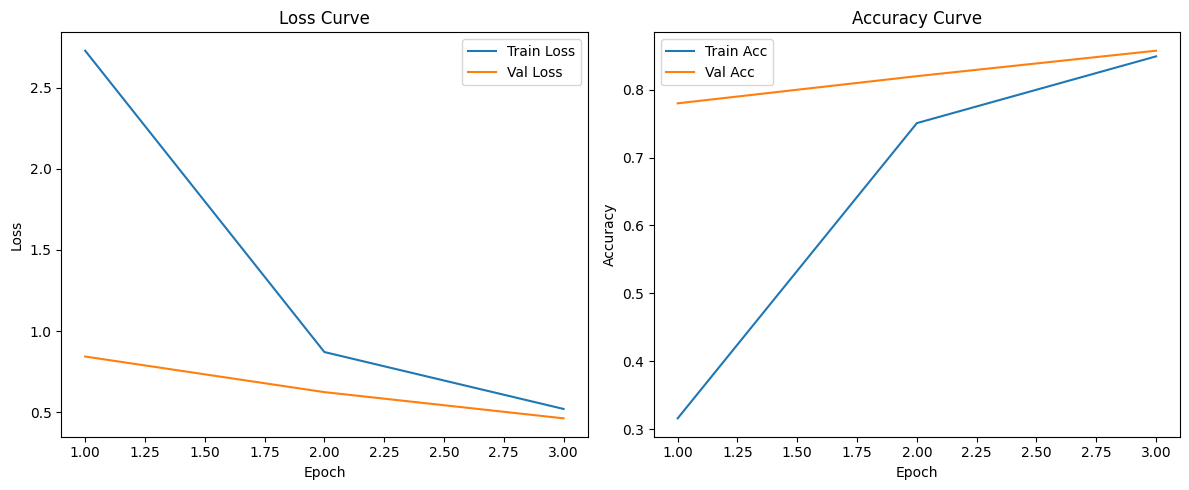

In [19]:
plot_learning_curves(train_losses2_r, val_losses2_r, train_accs2_r, val_accs2_r)

In [14]:
model_trainer3 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
)

Random seed set to: 42


In [15]:
train_losses3, train_accs3, val_losses3, val_accs3, test_loss3, test_acc3 = model_trainer3.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [00:32<01:05, 32.68s/it]

Train Loss: 2.7270, Train Acc: 0.3158


Epoch:  67%|██████▋   | 2/3 [01:08<00:34, 34.63s/it]

Train Loss: 0.8315, Train Acc: 0.7808


Epoch: 100%|██████████| 3/3 [01:47<00:00, 35.68s/it]


Train Loss: 0.5256, Train Acc: 0.8425
Best val Acc: 0.0000
Модель сохранена в best.pth


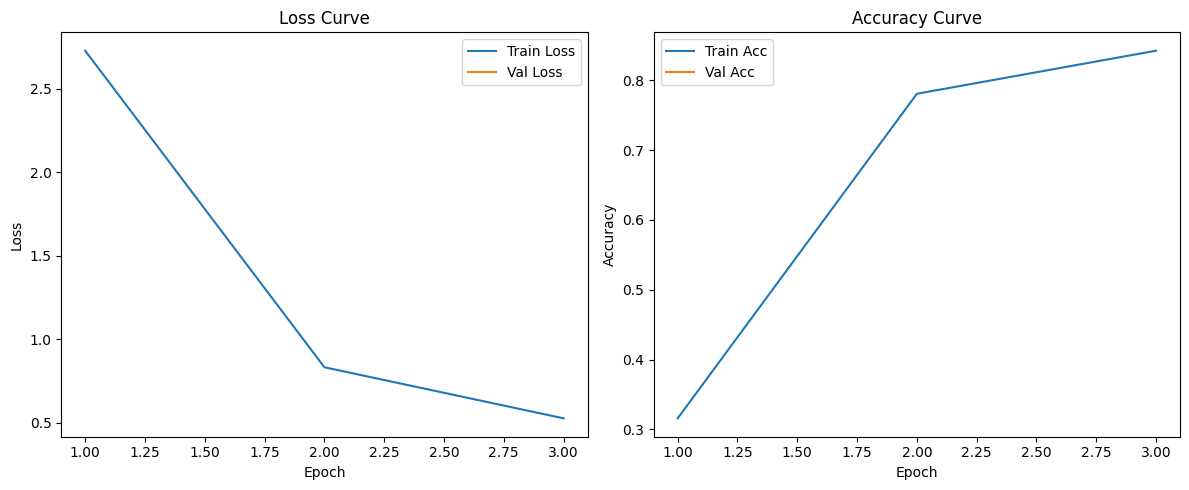

In [16]:
plot_learning_curves(train_losses3, val_losses3, train_accs3, val_accs3)

In [31]:
model_trainer3_a = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
)

Random seed set to: 42


In [32]:
train_losses3_a, train_accs3_a, val_losses3_a, val_accs3_a, test_loss3_a, test_acc3_a = model_trainer3_a.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [03:16<06:32, 196.19s/it]

Train Loss: 2.7270, Train Acc: 0.3158


Epoch:  67%|██████▋   | 2/3 [06:29<03:14, 194.40s/it]

Train Loss: 0.8315, Train Acc: 0.7808


Epoch: 100%|██████████| 3/3 [09:44<00:00, 194.86s/it]


Train Loss: 0.5256, Train Acc: 0.8425
Best val Acc: 0.0000
Модель сохранена в best.pth


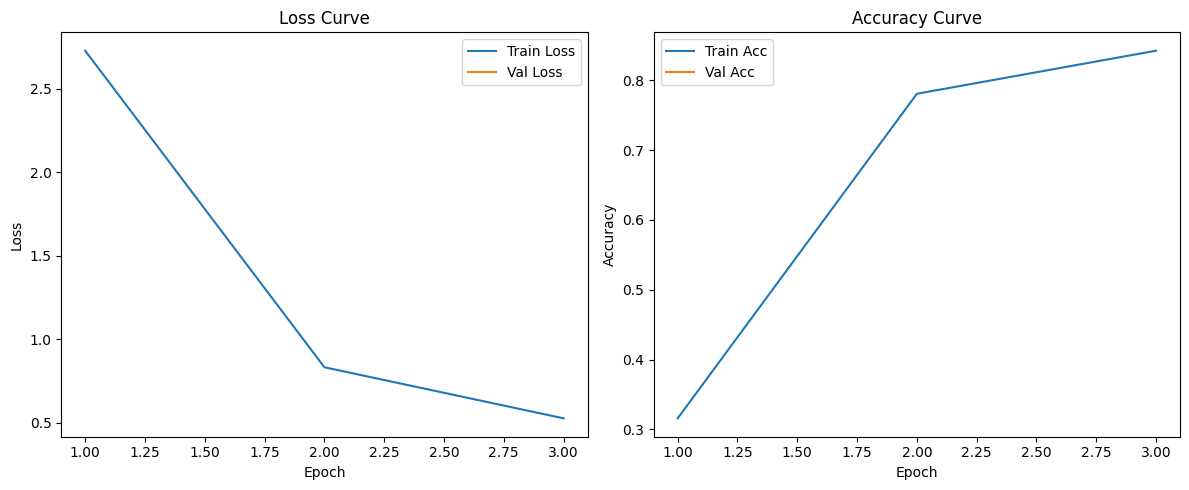

In [33]:
plot_learning_curves(train_losses3_a, val_losses3_a, train_accs3_a, val_accs3_a)

In [11]:
train_loader_kwargs2 = {"batch_size": 32, "shuffle": True, "num_workers": 4}
valid_loader_kwargs2 = {"batch_size": 32, "shuffle": False, "num_workers": 4}
test_loader_kwargs2 = {"batch_size": 32, "shuffle": False, "num_workers": 4}

In [12]:
model_trainer4 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs2,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs2,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs2
)

Random seed set to: 42


In [13]:
train_losses4, train_accs4, val_losses4, val_accs4, test_loss4, test_acc4 = model_trainer4.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [00:21<00:42, 21.45s/it]

Train Loss: 3.2300, Train Acc: 0.2100
Valid Loss: 1.1417, Valid Acc: 0.8100


Epoch:  67%|██████▋   | 2/3 [00:42<00:21, 21.20s/it]

Train Loss: 1.0364, Train Acc: 0.7142
Valid Loss: 0.4038, Valid Acc: 0.8700


Epoch: 100%|██████████| 3/3 [01:05<00:00, 21.95s/it]


Train Loss: 0.5486, Train Acc: 0.8508
Valid Loss: 0.5178, Valid Acc: 0.8525
Best val Acc: 0.8700
Модель сохранена в best.pth
Test Loss: 0.5309, Test Acc: 0.8375


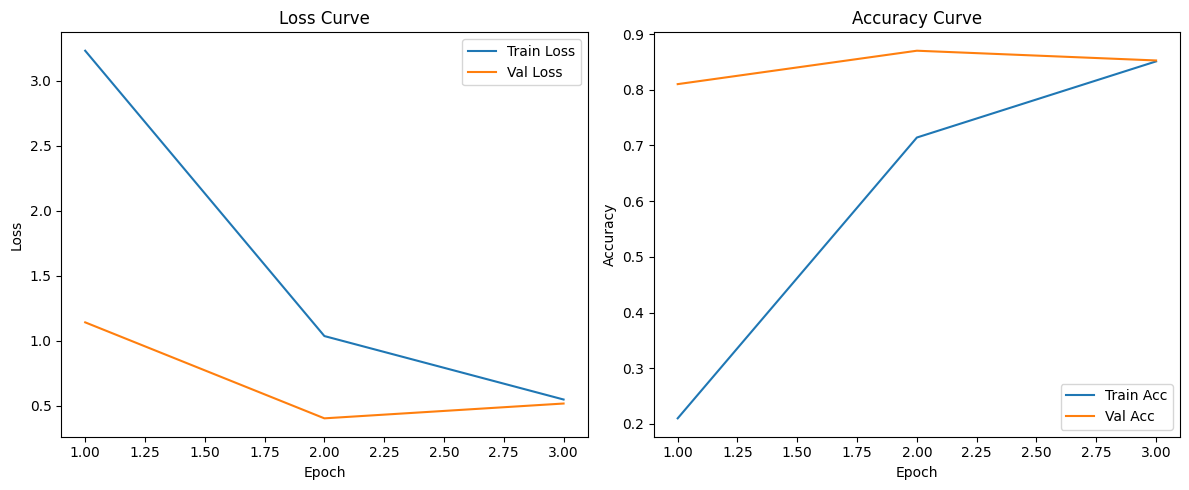

In [14]:
plot_learning_curves(train_losses4, val_losses4, train_accs4, val_accs4)

In [15]:
model_trainer4.reset()

Random seed set to: 42


In [16]:
train_losses4_r, train_accs4_r, val_losses4_r, val_accs4_r, test_loss4_r, test_acc4_r = model_trainer4.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [00:23<00:47, 23.91s/it]

Train Loss: 3.2300, Train Acc: 0.2100
Valid Loss: 1.1417, Valid Acc: 0.8100


Epoch:  67%|██████▋   | 2/3 [00:45<00:22, 22.26s/it]

Train Loss: 1.0364, Train Acc: 0.7142
Valid Loss: 0.4038, Valid Acc: 0.8700


Epoch: 100%|██████████| 3/3 [01:08<00:00, 22.80s/it]


Train Loss: 0.5486, Train Acc: 0.8508
Valid Loss: 0.5178, Valid Acc: 0.8525
Best val Acc: 0.8700
Модель сохранена в best.pth
Test Loss: 0.5309, Test Acc: 0.8375


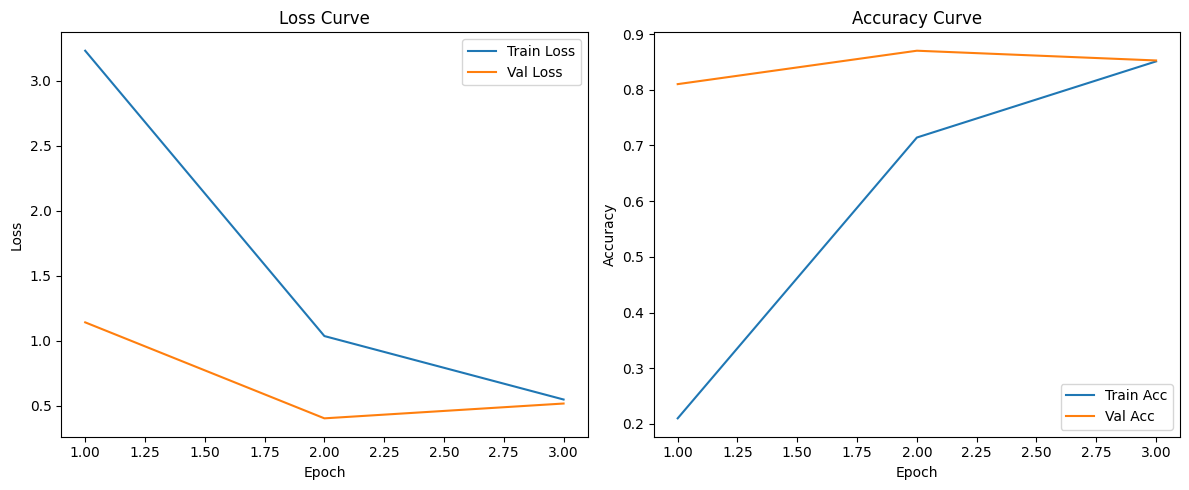

In [17]:
plot_learning_curves(train_losses4_r, val_losses4_r, train_accs4_r, val_accs4_r)

In [18]:
model_trainer5 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs2,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs2,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs2
)

Random seed set to: 42


In [19]:
train_losses5, train_accs5, val_losses5, val_accs5, test_loss5, test_acc5 = model_trainer5.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [00:23<00:47, 23.86s/it]

Train Loss: 3.2300, Train Acc: 0.2100
Valid Loss: 1.1417, Valid Acc: 0.8100


Epoch:  67%|██████▋   | 2/3 [00:47<00:23, 23.60s/it]

Train Loss: 1.0364, Train Acc: 0.7142
Valid Loss: 0.4038, Valid Acc: 0.8700


Epoch: 100%|██████████| 3/3 [01:08<00:00, 22.73s/it]


Train Loss: 0.5486, Train Acc: 0.8508
Valid Loss: 0.5178, Valid Acc: 0.8525
Best val Acc: 0.8700
Модель сохранена в best.pth
Test Loss: 0.5309, Test Acc: 0.8375


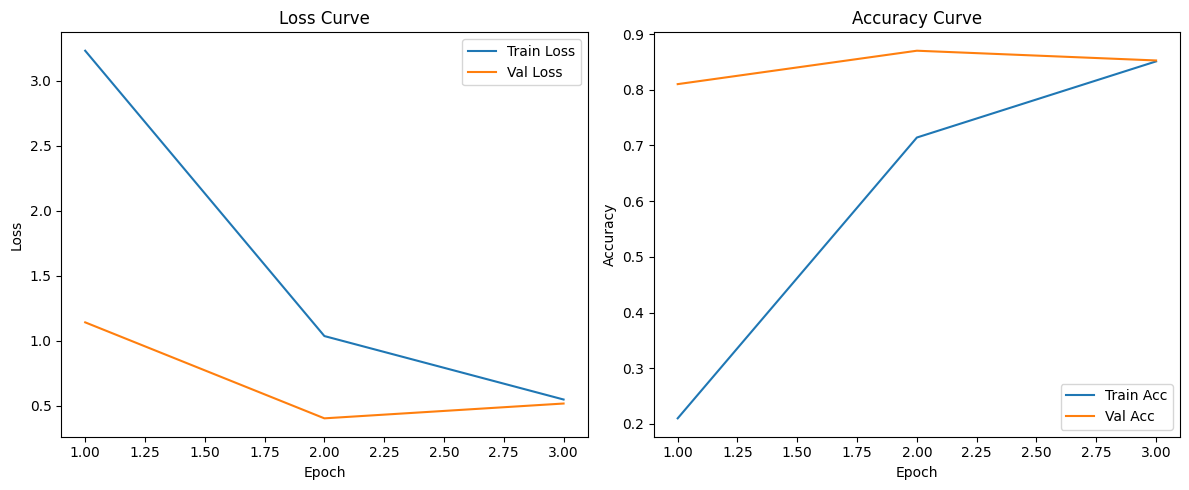

In [20]:
plot_learning_curves(train_losses5, val_losses5, train_accs5, val_accs5)

In [21]:
model_trainer5_a = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs2,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
)

Random seed set to: 42


In [22]:
train_losses5_a, train_accs5_a, val_losses5_a, val_accs5_a, test_loss5_a, test_acc5_a = model_trainer5_a.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [01:06<02:12, 66.37s/it]

Train Loss: 3.2300, Train Acc: 0.2100


Epoch:  67%|██████▋   | 2/3 [02:09<01:04, 64.39s/it]

Train Loss: 1.0364, Train Acc: 0.7142


Epoch: 100%|██████████| 3/3 [03:13<00:00, 64.62s/it]


Train Loss: 0.5486, Train Acc: 0.8508
Best val Acc: 0.0000
Модель сохранена в best.pth


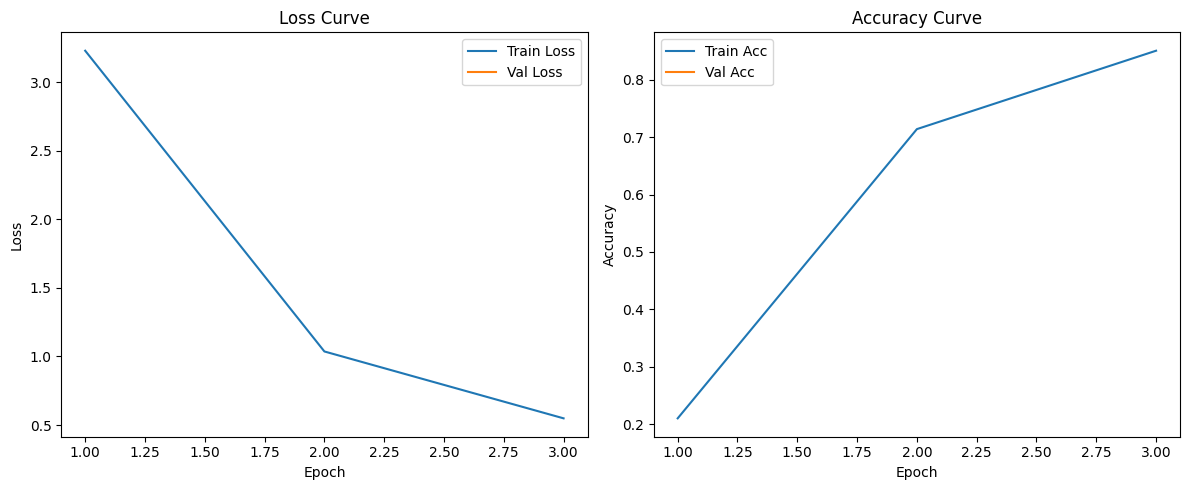

In [23]:
plot_learning_curves(train_losses5_a, val_losses5_a, train_accs5_a, val_accs5_a)

In [24]:
def custom_generator():
    g = torch.Generator()
    g.manual_seed(9999)
    return g

In [25]:
def offset_worker_init_fn(worker_id):
    seed = 999 + worker_id * 17
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)

In [29]:
train_loader_kwargs3 = {"batch_size": 32, "shuffle": True, "num_workers": 4, "generator": custom_generator(), "worker_init_fn": offset_worker_init_fn}
valid_loader_kwargs3 = {"batch_size": 32, "shuffle": False, "num_workers": 4, "worker_init_fn": offset_worker_init_fn}
test_loader_kwargs3 = {"batch_size": 32, "shuffle": False, "num_workers": 4, "worker_init_fn": offset_worker_init_fn}

In [30]:
model_trainer6 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs3,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs3,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs3
)

Random seed set to: 42


In [31]:
train_losses6, train_accs6, val_losses6, val_accs6, test_loss6, test_acc6 = model_trainer6.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [04:40<09:20, 280.04s/it]

Train Loss: 2.8851, Train Acc: 0.2842
Valid Loss: 0.9057, Valid Acc: 0.7450


Epoch:  67%|██████▋   | 2/3 [09:13<04:36, 276.24s/it]

Train Loss: 0.9179, Train Acc: 0.7267
Valid Loss: 0.3939, Valid Acc: 0.8875


Epoch: 100%|██████████| 3/3 [13:47<00:00, 275.90s/it]


Train Loss: 0.6175, Train Acc: 0.8183
Valid Loss: 0.7385, Valid Acc: 0.8675
Best val Acc: 0.8875
Модель сохранена в best.pth
Test Loss: 0.6868, Test Acc: 0.8200


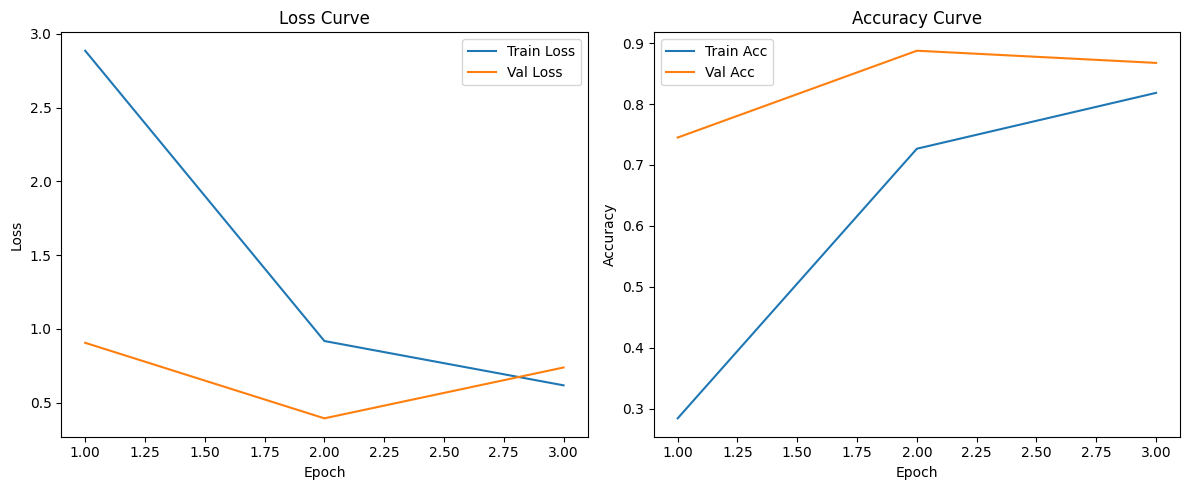

In [32]:
plot_learning_curves(train_losses6, val_losses6, train_accs6, val_accs6)

In [33]:
model_trainer6.reset()

Random seed set to: 42


In [34]:
train_losses6_r, train_accs6_r, val_losses6_r, val_accs6_r, test_loss6_r, test_acc6_r = model_trainer6.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [04:58<09:56, 298.14s/it]

Train Loss: 2.6900, Train Acc: 0.3108
Valid Loss: 0.8539, Valid Acc: 0.7725


Epoch:  67%|██████▋   | 2/3 [09:53<04:56, 296.36s/it]

Train Loss: 0.8843, Train Acc: 0.7450
Valid Loss: 0.6630, Valid Acc: 0.8425


Epoch: 100%|██████████| 3/3 [14:45<00:00, 295.26s/it]


Train Loss: 0.5456, Train Acc: 0.8425
Valid Loss: 0.4990, Valid Acc: 0.8675
Best val Acc: 0.8675
Модель сохранена в best.pth
Test Loss: 0.5851, Test Acc: 0.8475


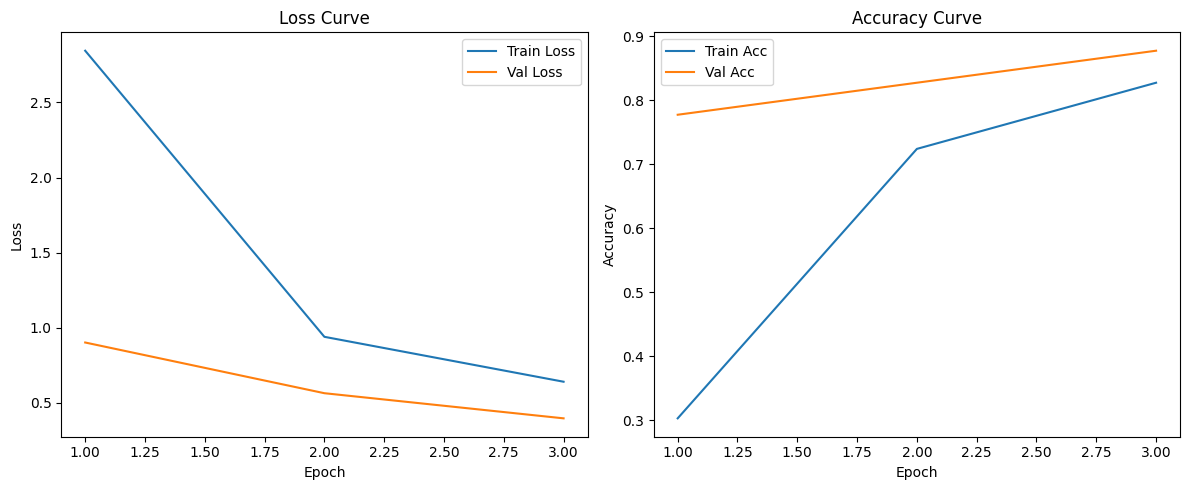

In [ ]:
plot_learning_curves(train_losses6_r, val_losses6_r, train_accs6_r, val_accs6_r)

In [ ]:
model_trainer7 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs3,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device,
    valid_data=valid_data,
    valid_loader_kwargs=valid_loader_kwargs3,
    test_data=test_data,
    test_loader_kwargs=test_loader_kwargs3
)

Random seed set to: 42


In [ ]:
train_losses7, train_accs7, val_losses7, val_accs7, test_loss7, test_acc7 = model_trainer7.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [03:48<07:37, 228.80s/it]

Train Loss: 2.7698, Train Acc: 0.3258
Valid Loss: 0.8649, Valid Acc: 0.7725


Epoch:  67%|██████▋   | 2/3 [07:34<03:47, 227.25s/it]

Train Loss: 0.9840, Train Acc: 0.7117
Valid Loss: 0.6104, Valid Acc: 0.8175


Epoch: 100%|██████████| 3/3 [11:24<00:00, 228.12s/it]


Train Loss: 0.5697, Train Acc: 0.8192
Valid Loss: 0.3996, Valid Acc: 0.8900
Best val Acc: 0.8900
Модель сохранена в best.pth
Test Loss: 0.5039, Test Acc: 0.8450


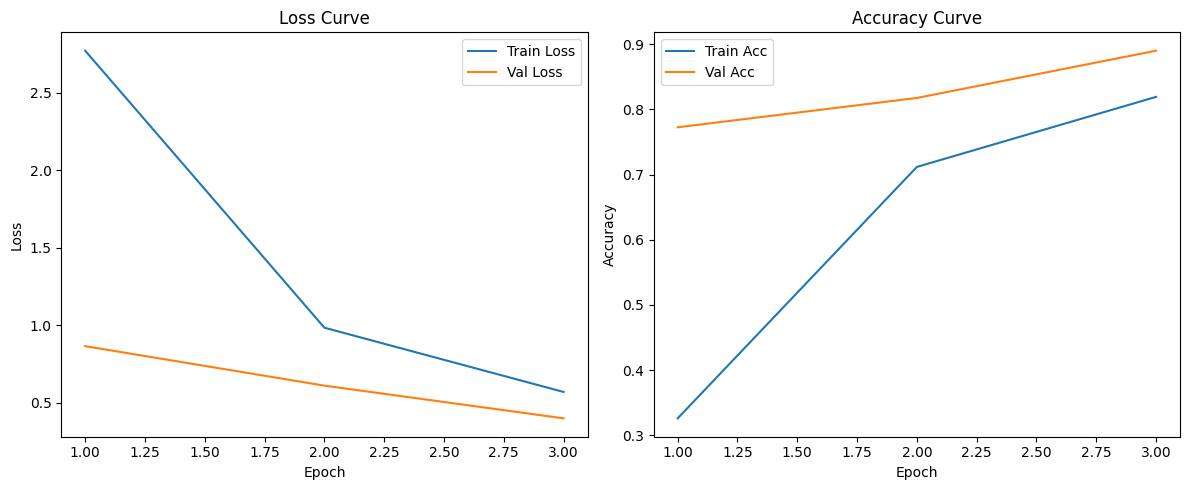

In [ ]:
plot_learning_curves(train_losses7, val_losses7, train_accs7, val_accs7)

In [ ]:
model_trainer8 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs3,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device
)

Random seed set to: 42


In [ ]:
train_losses8, train_accs8, val_losses8, val_accs8, test_loss8, test_acc8 = model_trainer8.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [03:55<07:50, 235.44s/it]

Train Loss: 2.6938, Train Acc: 0.3275


Epoch:  67%|██████▋   | 2/3 [07:46<03:52, 232.72s/it]

Train Loss: 0.8548, Train Acc: 0.7525


Epoch: 100%|██████████| 3/3 [11:38<00:00, 232.77s/it]


Train Loss: 0.5135, Train Acc: 0.8450
Best val Acc: 0.0000
Модель сохранена в best.pth


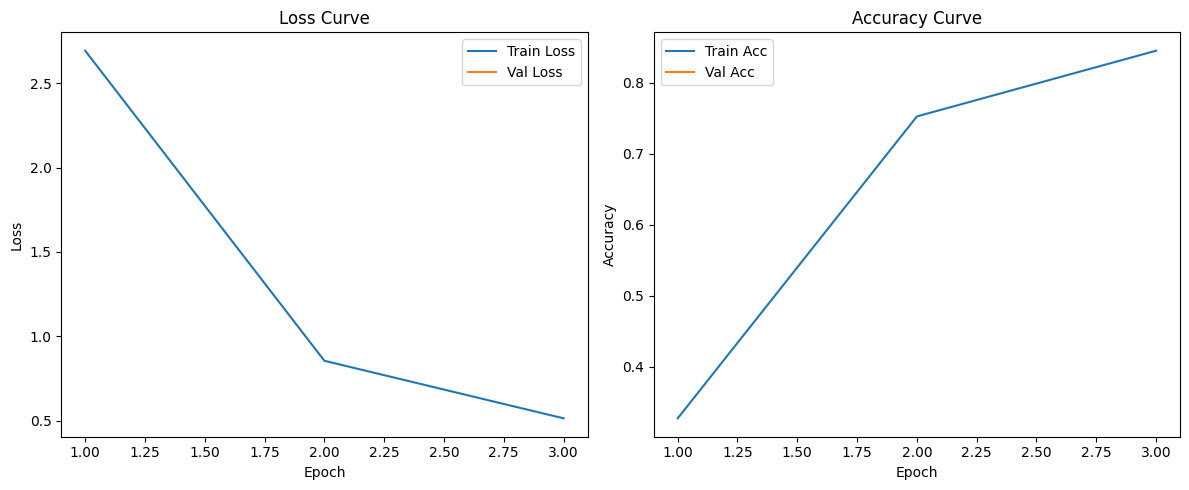

In [ ]:
plot_learning_curves(train_losses8, val_losses8, train_accs8, val_accs8)

In [ ]:
model_trainer8.reset()

Random seed set to: 42


In [ ]:
train_losses8_r, train_accs8_r, val_losses8_r, val_accs8_r, test_loss8_r, test_acc8_r = model_trainer8.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [04:08<08:17, 248.92s/it]

Train Loss: 2.7214, Train Acc: 0.3100


Epoch:  67%|██████▋   | 2/3 [08:20<04:10, 250.56s/it]

Train Loss: 0.8516, Train Acc: 0.7575


Epoch: 100%|██████████| 3/3 [12:29<00:00, 249.90s/it]


Train Loss: 0.5686, Train Acc: 0.8250
Best val Acc: 0.0000
Модель сохранена в best.pth


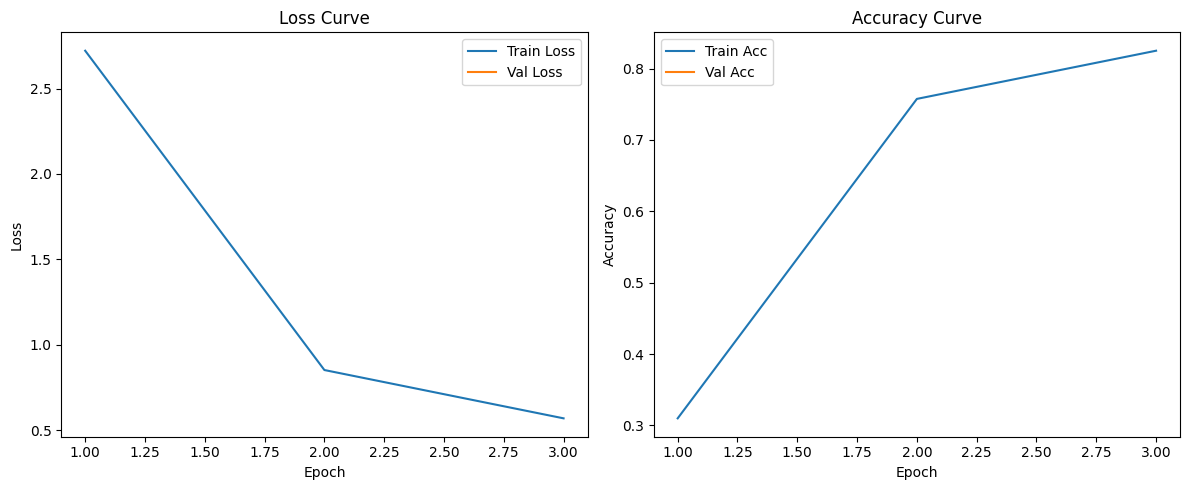

In [ ]:
plot_learning_curves(train_losses8_r, val_losses8_r, train_accs8_r, val_accs8_r)

In [ ]:
model_trainer9 = Trainer(
    model_cls=model_cls,
    train_data=train_data,
    train_loader_kwargs=train_loader_kwargs3,
    criterion_cls=criterion_cls,
    optimizer_cls=optimizer_cls,
    model_kwargs=model_kwargs,
    model_pretrain_weights_path=model_pretrain_weights_path,
    optimizer_kwargs=optimizer_kwargs,
    device=device
)

Random seed set to: 42


In [ ]:
train_losses9, train_accs9, val_losses9, val_accs9, test_loss9, test_acc9 = model_trainer9.train(num_epochs=3)

Epoch:  33%|███▎      | 1/3 [03:21<06:43, 201.66s/it]

Train Loss: 2.6045, Train Acc: 0.3533


Epoch:  67%|██████▋   | 2/3 [06:39<03:19, 199.42s/it]

Train Loss: 0.7576, Train Acc: 0.7900


Epoch: 100%|██████████| 3/3 [10:00<00:00, 200.23s/it]


Train Loss: 0.5409, Train Acc: 0.8433
Best val Acc: 0.0000
Модель сохранена в best.pth


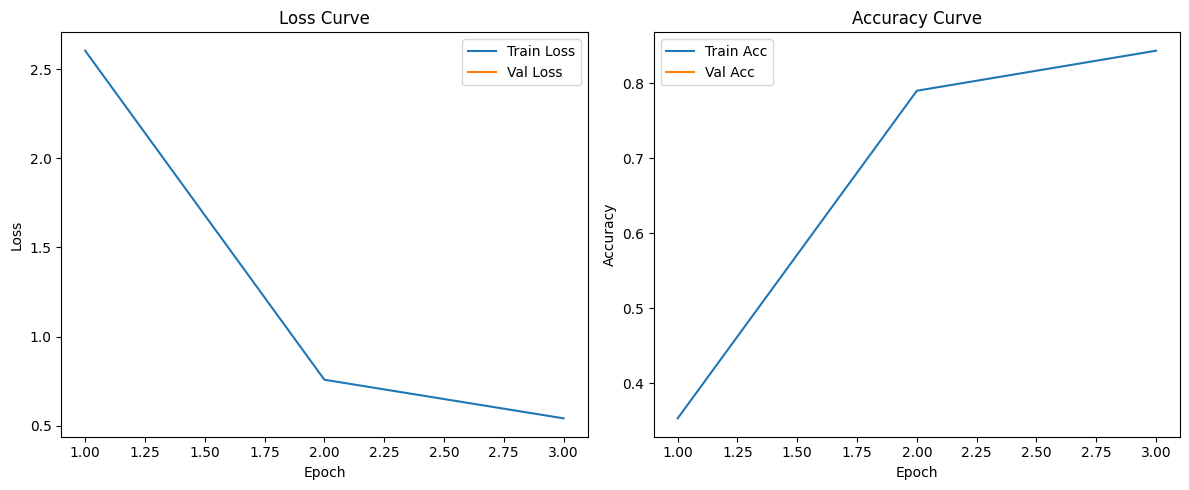

In [ ]:
plot_learning_curves(train_losses9, val_losses9, train_accs9, val_accs9)